In [87]:
import json
import pandas as pd
import numpy as np
import re
from pandas import *

In [88]:
#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

In [89]:
#sentiment analysis
from textblob import TextBlob

#text preprocessing
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/globemain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/globemain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [90]:
#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [91]:
df_final = pd.read_csv('data/mcdonalds_final.csv')

In [92]:
df_final.shape

(20414, 18)

In [93]:
df_final.head()

,Unnamed: 0,business_id,name,city,state,latitude,longitude,stars_x,review_count,is_open,review_id,user_id,stars_y,useful,funny,cool,text,date
0,0,CfwrsG76Wm4iLS22v_wAcg,McDonald's,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,Jop9vLXGgLY5wccfxh08hg,VULFcmvS5-zp1wt-aokPwA,1.0,0,0,0,Try cleaning your play area once in a while. I...,2016-02-13 22:57:36
1,1,CfwrsG76Wm4iLS22v_wAcg,McDonald's,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,14nFvaihx4rwTAETm9BJEA,83zQAHCvZGYgm8bjQoJ5wg,3.0,0,0,0,"It is what it is, a McDonalds. You get what y...",2014-08-02 16:19:00
2,2,CfwrsG76Wm4iLS22v_wAcg,McDonald's,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,E8GI0Dkub-QHg1g0_4OiBg,wd02D3NPbIZWr67qfrDldw,1.0,2,1,0,"Not one of the better McDonald's, I'm not usu...",2016-02-06 00:55:30
3,3,CfwrsG76Wm4iLS22v_wAcg,McDonald's,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,iwXKXdm2Vgi8qT2JKAbkBQ,PJ6LYU0111nU6ybRktbdpQ,5.0,0,0,0,"We barely waited in the fast food line, and th...",2017-11-29 02:26:24
4,4,CfwrsG76Wm4iLS22v_wAcg,McDonald's,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,MSyd64ek4d8K0-4uaxmfFQ,ofsfbDuMRXZm1NPfudAM2Q,3.0,1,0,0,The only reason they get three stars is becaus...,2018-04-22 18:22:53


In [94]:
# Drop unnecessary columns
df_final = df_final.drop(['Unnamed: 0', 'name', 'user_id', 'review_id'], axis=1)
df_final

,business_id,city,state,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool,text,date
0,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,1.0,0,0,0,Try cleaning your play area once in a while. I...,2016-02-13 22:57:36
1,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,3.0,0,0,0,"It is what it is, a McDonalds. You get what y...",2014-08-02 16:19:00
2,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,1.0,2,1,0,"Not one of the better McDonald's, I'm not usu...",2016-02-06 00:55:30
3,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,5.0,0,0,0,"We barely waited in the fast food line, and th...",2017-11-29 02:26:24
4,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,3.0,1,0,0,The only reason they get three stars is becaus...,2018-04-22 18:22:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,1.0,1,0,0,This location is actually closed. Was always u...,2019-09-29 17:39:23
20410,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,2.0,2,1,1,"The egg in the egg McGriddle was very dry, but...",2018-04-21 17:41:46
20411,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,1.0,0,0,0,TRASH! THIS IS THE MOST GHETTO MCDONALDS I HAV...,2019-08-28 19:48:41
20412,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,2.0,1,0,0,Went to this McDonald's because it was the clo...,2018-09-29 19:58:45


In [95]:
df_final

,business_id,city,state,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool,text,date
0,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,1.0,0,0,0,Try cleaning your play area once in a while. I...,2016-02-13 22:57:36
1,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,3.0,0,0,0,"It is what it is, a McDonalds. You get what y...",2014-08-02 16:19:00
2,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,1.0,2,1,0,"Not one of the better McDonald's, I'm not usu...",2016-02-06 00:55:30
3,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,5.0,0,0,0,"We barely waited in the fast food line, and th...",2017-11-29 02:26:24
4,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,3.0,1,0,0,The only reason they get three stars is becaus...,2018-04-22 18:22:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,1.0,1,0,0,This location is actually closed. Was always u...,2019-09-29 17:39:23
20410,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,2.0,2,1,1,"The egg in the egg McGriddle was very dry, but...",2018-04-21 17:41:46
20411,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,1.0,0,0,0,TRASH! THIS IS THE MOST GHETTO MCDONALDS I HAV...,2019-08-28 19:48:41
20412,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,2.0,1,0,0,Went to this McDonald's because it was the clo...,2018-09-29 19:58:45


In [96]:
# Separate into date, year, month, year_month and time
df_final['time']= df_final['date'].apply(lambda x: x.split()[1])
df_final['date']= df_final['date'].apply(lambda x: x.split()[0])
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['year'] = df_final['date'].dt.to_period('Y')
df_final['month'] = df_final['date'].dt.month
df_final['year_month'] = df_final['date'].dt.to_period('M')

In [97]:
df_final.describe()

,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool,month
count,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000
mean,37.125346,-101.757389,1.887749,45.169394,0.972323,1.889928,0.740227,0.453267,0.330557,6.694621
std,4.111376,15.853411,0.503017,31.027847,0.164050,1.358338,2.719963,1.739500,2.236007,3.323790
min,33.218044,-115.320341,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,33.599358,-115.097766,1.500000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,36.064026,-111.963815,2.000000,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000
75%,40.444636,-80.997633,2.000000,64.000000,1.000000,3.000000,1.000000,0.000000,0.000000,10.000000
max,51.291157,-73.211689,4.500000,126.000000,1.000000,5.000000,119.000000,63.000000,99.000000,12.000000


In [98]:
# Show stats of stores and reviews
print("Number of Stores Currently Open: ",len(df_final[df_final['is_open']==1]["business_id"].value_counts()))
print("Number of Stores Currently Closed: ",len(df_final[df_final['is_open']==0]["business_id"].value_counts()))
print("Total Number of Unique Stores: ", df_final['business_id'].nunique())
print("Number of Total Reviews: ",len(df_final))

Number of Stores Currently Open:  799
Number of Stores Currently Closed:  56
Total Number of Unique Stores:  855
Number of Total Reviews:  20414


In [99]:
df_final['is_open'].unique()

array([1, 0])

In [100]:
df_final.describe()

,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool,month
count,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000
mean,37.125346,-101.757389,1.887749,45.169394,0.972323,1.889928,0.740227,0.453267,0.330557,6.694621
std,4.111376,15.853411,0.503017,31.027847,0.164050,1.358338,2.719963,1.739500,2.236007,3.323790
min,33.218044,-115.320341,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,33.599358,-115.097766,1.500000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,36.064026,-111.963815,2.000000,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000
75%,40.444636,-80.997633,2.000000,64.000000,1.000000,3.000000,1.000000,0.000000,0.000000,10.000000
max,51.291157,-73.211689,4.500000,126.000000,1.000000,5.000000,119.000000,63.000000,99.000000,12.000000


In [101]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   business_id   20414 non-null  object        
 1   city          20414 non-null  object        
 2   state         20414 non-null  object        
 3   latitude      20414 non-null  float64       
 4   longitude     20414 non-null  float64       
 5   stars_x       20414 non-null  float64       
 6   review_count  20414 non-null  int64         
 7   is_open       20414 non-null  int64         
 8   stars_y       20414 non-null  float64       
 9   useful        20414 non-null  int64         
 10  funny         20414 non-null  int64         
 11  cool          20414 non-null  int64         
 12  text          20414 non-null  object        
 13  date          20414 non-null  datetime64[ns]
 14  time          20414 non-null  object        
 15  year          20414 non-null  period

In [102]:
df_final.columns

Index(['business_id', 'city', 'state', 'latitude', 'longitude', 'stars_x',
       'review_count', 'is_open', 'stars_y', 'useful', 'funny', 'cool', 'text',
       'date', 'time', 'year', 'month', 'year_month'],
      dtype='object')

In [103]:
df_final.state.unique()

array(['OH', 'ON', 'AZ', 'NV', 'NC', 'WI', 'IL', 'PA', 'QC', 'AB', 'SC',
       'NY'], dtype=object)

In [104]:
df_final.city.nunique()

216

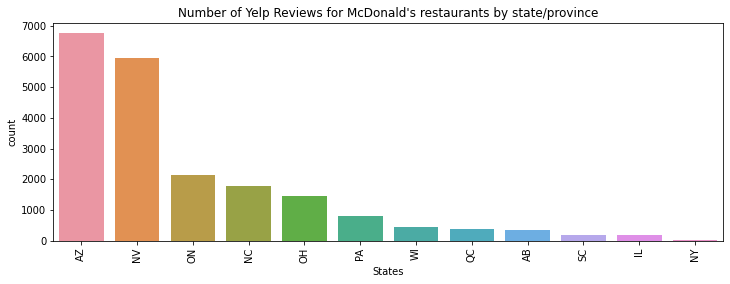

In [105]:
fig = plt.figure(figsize = (12,4))
sns.countplot(df_final['state'],order = df_final["state"].value_counts().index)
plt.title("Number of Yelp Reviews for McDonald's restaurants by state/province")
plt.xlabel('States')
plt.xticks(rotation = 90)
plt.savefig('by_state.png')

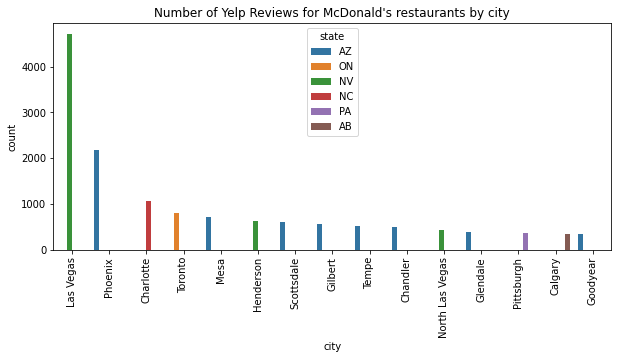

In [106]:

main_cities = list(df_final["city"].value_counts().index[0:15])
mcd_main_cities = df_final[df_final['city'].isin(main_cities)]

fig= plt.figure(figsize = (10,5))
sns.countplot(mcd_main_cities['city'],order = mcd_main_cities["city"].value_counts().index, hue = mcd_main_cities['state'])
plt.title("Number of Yelp Reviews for McDonald's restaurants by city")
plt.xlabel('city')
plt.xticks(rotation = 90)
fig.subplots_adjust(bottom=0.25)
plt.savefig('by_city.png')

## Text Preprocessing

In [107]:
# Show sample of a review before preprocessing
df_final['text'][15]

"I think most of us have certain expectations of any restaurant. My experience with this location has poisoned me against all McDonald's. It started when my wife said she wanted a fruit smoothy. We ordered our smoothies which came to $8 for 2 larges. Cool fun thing to do right...\n\nThe next day I saw my card had been double charged. So I went back and asked the manager if she could make it right. I said I didn't even need a cash refund it would have been fine to just take it off the order I was about to make. She said she could not do that and that she had no way to look it up. She gave me a phone number to their office in Mentor. I called the person in Mentor who looked up my order she said I needed to wait 10 days or so because the card had been authorized but not charged twice. \n\n10 days later the charge came off but I expect when I go out for food my card will not be double authorized. Be that as it may $8 worth of food would have fixed this. I will NEVER go back to McDonald's b

In [108]:
# Clean data with regular expressions (Round: 01)
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [109]:
# Use the "clean_text_round1" function to clean the data for Round: 01
data_clean = pd.DataFrame(df_final['text'].apply(round1))
data_clean

,text
0,try cleaning your play area once in a while it...
1,it is what it is a mcdonalds you get what you...
2,not one of the better mcdonalds im not usuall...
3,we barely waited in the fast food line and the...
4,the only reason they get three stars is becaus...
...,...
20409,this location is actually closed was always un...
20410,the egg in the egg mcgriddle was very dry but ...
20411,trash this is the most ghetto mcdonalds i have...
20412,went to this mcdonalds because it was the clos...


In [110]:
data_clean.text[15]

'i think most of us have certain expectations of any restaurant my experience with this location has poisoned me against all mcdonalds it started when my wife said she wanted a fruit smoothy we ordered our smoothies which came to  for  larges cool fun thing to do right\n\nthe next day i saw my card had been double charged so i went back and asked the manager if she could make it right i said i didnt even need a cash refund it would have been fine to just take it off the order i was about to make she said she could not do that and that she had no way to look it up she gave me a phone number to their office in mentor i called the person in mentor who looked up my order she said i needed to wait  days or so because the card had been authorized but not charged twice \n\n days later the charge came off but i expect when i go out for food my card will not be double authorized be that as it may  worth of food would have fixed this i will never go back to mcdonalds because of how this was hand

In [111]:
# Apply second round of cleaning -- Round: 02
# clean whitespace and reserved symbols or character escape like \t or \n
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [112]:
data_clean = pd.DataFrame(data_clean['text'].apply(round2))
data_clean

,text
0,try cleaning your play area once in a while it...
1,it is what it is a mcdonalds you get what you...
2,not one of the better mcdonalds im not usuall...
3,we barely waited in the fast food line and the...
4,the only reason they get three stars is becaus...
...,...
20409,this location is actually closed was always un...
20410,the egg in the egg mcgriddle was very dry but ...
20411,trash this is the most ghetto mcdonalds i have...
20412,went to this mcdonalds because it was the clos...


In [113]:
data_clean.text[15]

'i think most of us have certain expectations of any restaurant my experience with this location has poisoned me against all mcdonalds it started when my wife said she wanted a fruit smoothy we ordered our smoothies which came to  for  larges cool fun thing to do rightthe next day i saw my card had been double charged so i went back and asked the manager if she could make it right i said i didnt even need a cash refund it would have been fine to just take it off the order i was about to make she said she could not do that and that she had no way to look it up she gave me a phone number to their office in mentor i called the person in mentor who looked up my order she said i needed to wait  days or so because the card had been authorized but not charged twice  days later the charge came off but i expect when i go out for food my card will not be double authorized be that as it may  worth of food would have fixed this i will never go back to mcdonalds because of how this was handled'

In [114]:
# Create document-term matrix using CountVectorizer
# Convert to array and label all columns
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean['text'])
# Document-Term Matrix
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm



,aa,aaa,aaaaand,aaaaassssss,aaarghthat,aaddress,aalso,aand,aaron,aas,...,记得以前系路口位,试了新品安格斯牛肉汉堡,转角零舍易看到,都算几nice有礼貌,门口系地下一楼,门面不大,隔离有超市,靠近学校的原因,顺便系新整好的food,麥當勞門口保安的溝通技巧給我整個完美的旅行帶來的最惡劣的留念
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Using the TF-IDF Vectorizer in sklearn

In [115]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
corpus = df_final['text']

In [117]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8,stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(corpus)

In [132]:
X.shape

(20414, 2500)

In [133]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07852817, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [118]:
processed_features = vectorizer.fit_transform(corpus).toarray()

In [119]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [120]:
type(vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [121]:
X

<20414x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 666214 stored elements in Compressed Sparse Row format>

In [122]:
type(X)

scipy.sparse.csr.csr_matrix

In [123]:
processed_features.shape

(20414, 2500)

In [124]:
processed_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07852817, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [125]:
type(processed_features)

numpy.ndarray

### Dividing Data into Training and Test Sets

In [126]:
import numpy as np
from sklearn.model_selection import train_test_split

In [127]:
X = processed_features
y = df_final['stars_y']

In [128]:
X.shape, y.shape

((20414, 2500), (20414,))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

### Making Predictions and Evaluating the Model

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
y

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
print(X.shape)

In [ ]:

>>> X = vectorizer.fit_transform(corpus)
>>> print(vectorizer.get_feature_names())
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
>>> print(X.shape)
(4, 9)

# run text column
## Parameters
# max_features - 
# min_df - minimum document frequency
# max_df - maximum document frequency

In [ ]:
df_final['stars_y'].shape

In [ ]:
y = df_final['stars_y']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined

In [ ]:
y.describe()

In [ ]:
y.value_counts()

In [ ]:
plt.figure(figsize=(6,10))
y.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Ratings of Reviews by Percentage')
plt.savefig('mcdonalds_piechart.png',dpi=100)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
data_dtm

NameError: name 'data_dtm' is not defined

### Linear Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [ ]:
# text, data, labels
#  build two models

In [ ]:
# MVP

In [ ]:
## Later
# Word2Vec
# vector representation of every word
# ask neural network to predict nearby words

In [ ]:
#tfidf vectorizer
# transformed text is training seta
# ratings would be y
# make regression models

In [ ]:
# Use NLTK corpus to remove other languages
import nltk
words = set(nltk.corpus.words.words())

In [ ]:
# Remove other languages, mixed pharases
# nltk.corpus.words.words

In [ ]:
# TD-IDF vectorizer, reassign dataframe
# Adjust columns
# pd.set_option()

In [ ]:
data_dtm.nunique

In [ ]:
# Add column for text length of characters for each review
df_final['text_length'] = df_final['Text'].apply(len)
df_final.head()

In [ ]:
# Show plot of Text Length distribution
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(12,8))
sns.distplot(final_df['Text Length'], kde=True, bins=50)
plt.title("Distribution of Text Length of Yelp Reviews on McDonald's")

In [ ]:
df_final.describe()

In [ ]:
df_final.info()

In [ ]:
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1 = sns.countplot(x='Stars', data=df_final)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

axes2 = plt.subplot(2,2,2)
axes2 = sns.countplot(x='Cool', data=df_final)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

axes3 = plt.subplot(2,2,3)
axes3 = sns.countplot(x='Useful', data=df_final)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

axes4 = plt.subplot(2,2,4)
axes4 = sns.countplot(x='Funny', data=df_final)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

In [ ]:
mcd_corr = df_final[['Stars', 'Cool', 'Useful', 'Funny', 'Text Length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(mcd_corr, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

In [ ]:
# pairplot
sns.pairplot(df_final, hue='Stars', palette='coolwarm')

In [ ]:
warnings.filterwarnings("ignore")
sns.boxplot(x='Stars', y='Text Length', data=df_final, palette='rainbow')

In [ ]:
# stars_x is average rating of business (McDonald's)
# stars_y is rating of review given by individual user 
# Join data_clean and "Stars" column of df_final
df_final['data_clean'] = data_clean
df_final2 = df_final[['Stars','data_clean']

In [ ]:
df_final2.head()

In [ ]:
# Add a column with text in list format
def get_word_list(text):
    return [word.lower() for word in text.split() if word.lower()]


In [ ]:
#   return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
# Plot frequency distribution of words for the reviews
words_split = []
for i in range(0,9999): 
    for word in df_final2['data_clean'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

In [ ]:
df_text = df_final2['data_clean'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
# Frequency of words in 1-star rating reviews
warnings.filterwarnings("ignore")
df_text_star_1 = df_final2[df_final2['Stars']==1]
df_text_star_1['Text'] = df_text_star_1['Text'].apply(get_word_list)
yelp_text_stars1.count()

In [ ]:
df_text_star_1 = df_text_star_1.reset_index(drop=True)
words_split = []
for i in range(0,749): 
    for word in df_text_star_1['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

In [ ]:
# Frequency of words in 1-star rating reviews
warnings.filterwarnings("ignore")
df_text_star_5 = df_final2[df_final2['Stars']==5]
df_text_star_5['Text'] = df_text_star_5['Text'].apply(get_word_list)
df_text_star_5.count()

In [ ]:
df_text_star_5 = df_text_star_5.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in df_text_star_5 ['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

In [ ]:
df_text_star_5 = df_text_star_5 ['Text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_text_star_5))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
df_final2.to_csv('mcdonalds_clean.csv')

In [ ]:
df_final['stars_x'].describe()

In [ ]:
### Group by Stars for mean values

In [ ]:
df_final.columns

In [ ]:
star_votes = df_final.groupby('stars_y').mean()

In [ ]:
star_votes

In [ ]:
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

In [ ]:
star_votes[['useful','funny','cool']]

In [ ]:
df_final['useful'].unique()

In [ ]:
### Multinomial naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)
predmnb = mnb.predict(X_test)

In [ ]:
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
preddt = dt.predict(X_test)

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

### Support Vector Machines (SVM)

In [56]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)

In [57]:
svm.fit(X_train,y_train)

SVC(random_state=101)

In [59]:
predsvm = svm.predict(X_test)

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [131]:
df_final['stars_y'].value_counts()

1.0    12847
2.0     2299
5.0     1900
3.0     1836
4.0     1532
Name: stars_y, dtype: int64

In [64]:
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[2520    6    9    1   13]
 [ 411    6   29    6    5]
 [ 171   12  105   56   37]
 [  65   10   66   84   95]
 [  84    0   23   42  227]]
Score: 72.05


NameError: name 'classification_report' is not defined

In [ ]:
# model coefficients, feature importance

In [162]:
plot_confusion_matrix(y_test,predsvm)

TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'

In [58]:
>>> y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
>>> y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
>>> confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

NameError: name 'confusion_matrix' is not defined

## Random Forest Regression

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [152]:
rf_reg = RandomForestRegressor(verbose=51,n_jobs=-1)

In [153]:
rf_reg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100building tree 5 of 100
building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.0min

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.0min

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.0min

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.1min

building tree 14 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.1min

building tree 15 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.2min

building tree 16 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.6min

building tree 17 of 100[Parallel(n_jobs=-1)]: Do

RandomForestRegressor(n_jobs=-1, verbose=51)

In [154]:
y_pred = rf_reg.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

## Model Evaluation

In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
# means square error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.9391882468869793

In [157]:
mse

0.8820745630906377

In [159]:
rf_reg.feature_importances_

array([2.81926025e-05, 1.21940872e-03, 7.76151764e-05, ...,
       6.34742165e-06, 8.88780268e-04, 3.20383687e-05])

In [163]:
plot_confusion_matrix(y_test, y_pred)

TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'

In [ ]:
rf_reg.model

### Gradient Boosting

In [166]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [167]:
gb_reg = GradientBoostingRegressor(random_state=0)

In [168]:
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [172]:
fea_imp = rf_reg.feature_importances_

In [174]:
fea_imp.shape

(2500,)

In [170]:
df_final

,business_id,city,state,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool,text,date,time,year,month,year_month
0,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,1.0,0,0,0,Try cleaning your play area once in a while. I...,2016-02-13,22:57:36,2016,2,2016-02
1,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,3.0,0,0,0,"It is what it is, a McDonalds. You get what y...",2014-08-02,16:19:00,2014,8,2014-08
2,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,1.0,2,1,0,"Not one of the better McDonald's, I'm not usu...",2016-02-06,00:55:30,2016,2,2016-02
3,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,5.0,0,0,0,"We barely waited in the fast food line, and th...",2017-11-29,02:26:24,2017,11,2017-11
4,CfwrsG76Wm4iLS22v_wAcg,Parma Heights,OH,41.385949,-81.768113,2.5,15,1,3.0,1,0,0,The only reason they get three stars is becaus...,2018-04-22,18:22:53,2018,4,2018-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,1.0,1,0,0,This location is actually closed. Was always u...,2019-09-29,17:39:23,2019,9,2019-09
20410,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,2.0,2,1,1,"The egg in the egg McGriddle was very dry, but...",2018-04-21,17:41:46,2018,4,2018-04
20411,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,1.0,0,0,0,TRASH! THIS IS THE MOST GHETTO MCDONALDS I HAV...,2019-08-28,19:48:41,2019,8,2019-08
20412,Y-vxPbvPKcaLiYa9ZBXoDg,Pittsburgh,PA,40.440433,-79.998637,1.5,24,0,2.0,1,0,0,Went to this McDonald's because it was the clo...,2018-09-29,19:58:45,2018,9,2018-09
